Project goal:

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to help them estimate taxi fares before the ride and whether the coustomer who pay with credit card will leave a tip or not, based on data that TLC has gathered.

Background:

Since 1971, TLC has been regulating and overseeing the licensing of New York City's taxi cabs, for-hire vehicles, commuter vans, and paratransit vehicles.

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

Note: This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior.


Data Dictionary:-

1) ID:Trip identification number

2) VendorID: A code indicating the TPEP provider that provided the record.  
1= Creative Mobile Technologies, LLC;

2= VeriFone Inc.

3) tpep_pickup_datetime: The date and time when the meter was engaged.

4) tpep_dropoff_datetime: The date and time when the meter was disengaged.

5)Passenger_count: The number of passengers in the vehicle.  This is a driver-entered value.

6) Trip_distance: The elapsed trip distance in miles reported by the taximeter.

7) PULocationID: TLC Taxi Zone in which the taximeter was engaged

8) DOLocationID: TLC Taxi Zone in which the taximeter was disengaged

9) RateCodeID: The final rate code in effect at the end of the trip.

1= Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

10) Store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

11) Payment_type: A numeric code signifying how the passenger paid for the trip.  

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip

12) Fare_amount: The time-and-distance fare calculated by the meter.

13) Extra: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

14) MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

15) Improvement_surcharge: $0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015.

16) Tip_amount: This field is automatically populated for credit card tips. Cash tips are not included.

17) Tolls_amount: Total amount of all tolls paid in trip.

18) Total_amount: The total amount charged to passengers. Does not include cash tips.

This Project is divided into 5 parts:

1) In the earliest stage of the this project. The following tasks are performed:
*   Building a dataframe for the TLC dataset
*   Examining data type of each column
*   Gathering descriptive statistics

2)Cleaning the data and conducting exploratory data analysis on data of this project

3)Conducting hypothesis testing on the relationship between payment type and the fare amount the customer pays

4)Creating a regression model to estimate taxi fares before the ride:
*   Build a regression model
*   Checking model assumptions
*   Evaluate the model

5)Creating any other machine learning model to check whether the coustomer will leave a tip or not:
*   Model building
*   Model evaluation







In [104]:
#Import libraries and packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# **Part 1**

In [105]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [106]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There 22699 entries. There are no null values in any column. There are three non_numeric variabels. The first column name is not properly handled.

In [108]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


There are questionable values:
        min of passenger_count is 0,
        min of trip_distance is 0,
        max of RatecodeID is 99,
        min of fare_amount is a negative value,
        min of extra is a negative value,
        min of mta_tax is a negative value,
        min of improvement_surcharge is a negative value,
        min of total_amount is a negative value,

In [109]:
# Number of times  each vendor ID represented in the data
df['VendorID'].value_counts()

,count
VendorID,
2,12626
1,10073


In [110]:
# Mean total amount for each vendor
df.groupby('VendorID')['total_amount'].mean()

,total_amount
VendorID,
1,16.298119
2,16.320382


In [111]:
# Representation of each payment type in the data
df['payment_type'].value_counts()

,count
payment_type,
1,15265
2,7267
3,121
4,46


In [112]:
# average tip for trips paid for with credit card
avg_cc=df[df['payment_type'] == 1]['tip_amount'].mean()
print("average tip for trips paid for with credit card")
print(avg_cc)

# average tip for trips paid for with cash
avg_cash=df[df['payment_type'] == 2]['tip_amount'].mean()
print("average tip for trips paid for with cash")
print(avg_cash)


average tip for trips paid for with credit card
2.7298001965280054
average tip for trips paid for with cash
0.0


In [113]:
# Filtering the data for credit card payments only
cc_df=df[df['payment_type'] == 1]
# Filtering the credit-card-only data for passenger count only
cc_df['passenger_count'].value_counts()

,count
passenger_count,
1,10977
2,2168
5,775
3,600
6,451
4,267
0,27


In [114]:
# Calculating the average tip amount for each passenger count (credit card payments only)
cc_df.groupby('passenger_count')['tip_amount'].mean()

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


# **Part 2**

Checking for any missing values in the data.

In [115]:
df.isnull().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0


Checking for any duplicate entries in the data.

In [116]:
df.duplicated().sum()

0

In [117]:
# Converting data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

Creating a new column called duration that represents the total number of minutes that each taxi ride took.

In [118]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


Checking for any outliers in the columns which are important in predicting the outcome.

<Axes: title={'center': 'trip_distance'}, xlabel='trip_distance'>

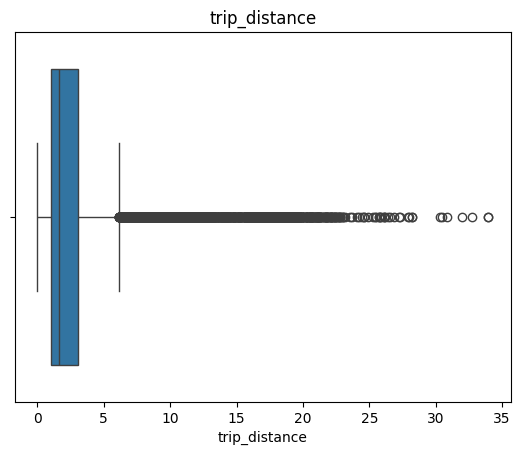

In [119]:
plt.title('trip_distance')
sns.boxplot(x=df['trip_distance'])

I feel these outliers are not a mistake (except 0's) because a trip distance can be around 30 miles

In [120]:
df1=df[df['trip_distance']==0]
df1['trip_distance'].count()

148

In [121]:
df=df[df['trip_distance']!=0]
df.shape

(22551, 19)

<Axes: title={'center': 'fare_amount'}, xlabel='fare_amount'>

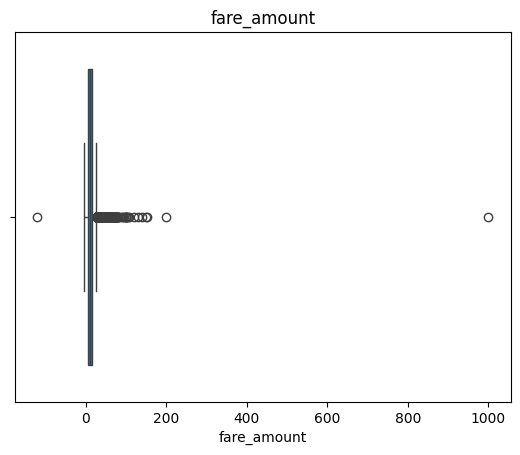

In [122]:
plt.title('fare_amount')
sns.boxplot(x=df['fare_amount'])

In [123]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [124]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22551.000000
mean        12.867297
std         10.418788
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



<Axes: title={'center': 'duration'}, xlabel='duration'>

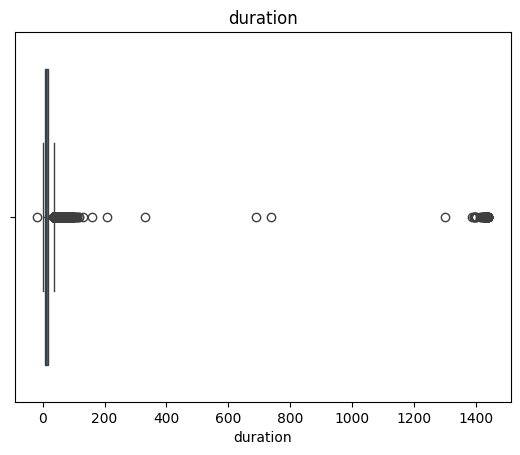

In [125]:
plt.title('duration')
sns.boxplot(x=df['duration'])

In [126]:
outlier_imputer(['duration'], 6)

duration
q3: 18.45
upper_threshold: 88.85
count    22551.000000
mean        14.548426
std         11.934231
min          0.000000
25%          6.716667
50%         11.233333
75%         18.450000
max         88.850000
Name: duration, dtype: float64



In [127]:
df1=df[df['passenger_count']==0]
df1['passenger_count'].count()

32

In [128]:
df=df[df['passenger_count']!=0]
df.shape

(22519, 19)

Text(0.5, 1.0, 'Trip distance histogram')

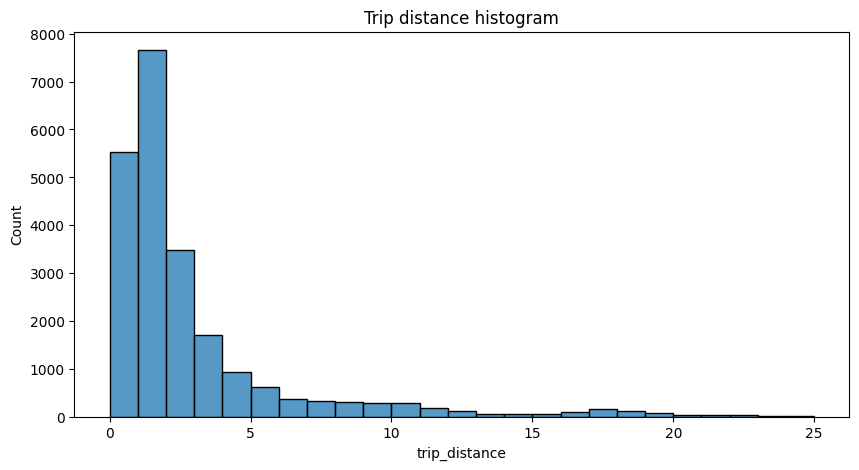

In [129]:
# Creating histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram')

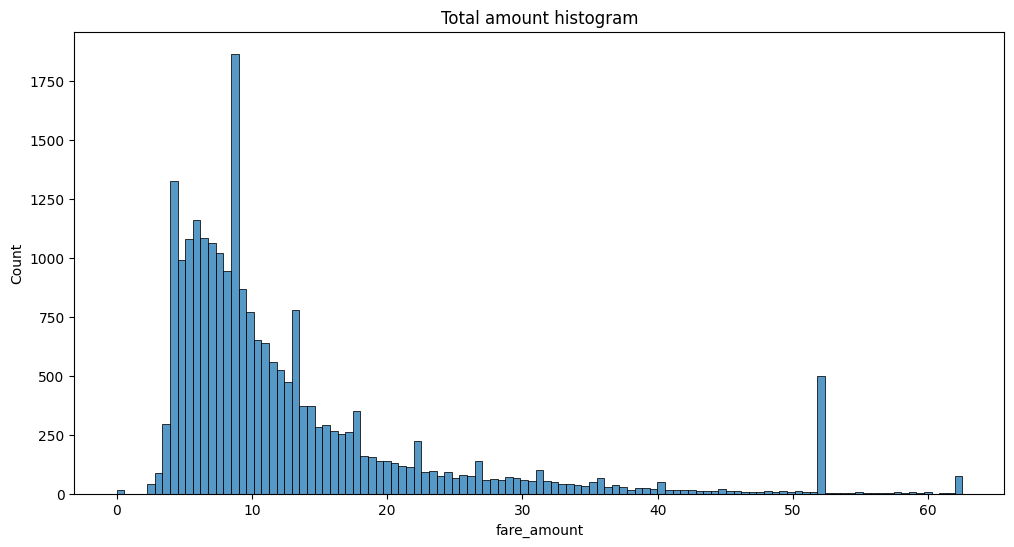

In [130]:
# Creating histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['fare_amount'])

plt.title('Total amount histogram');

Text(0.5, 1.0, 'Tip amount histogram')

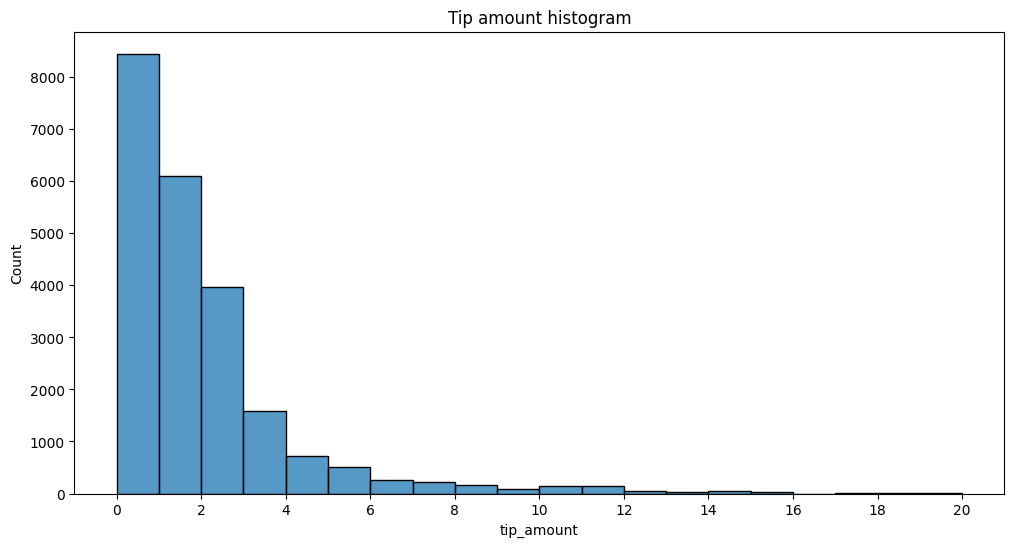

In [131]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram')

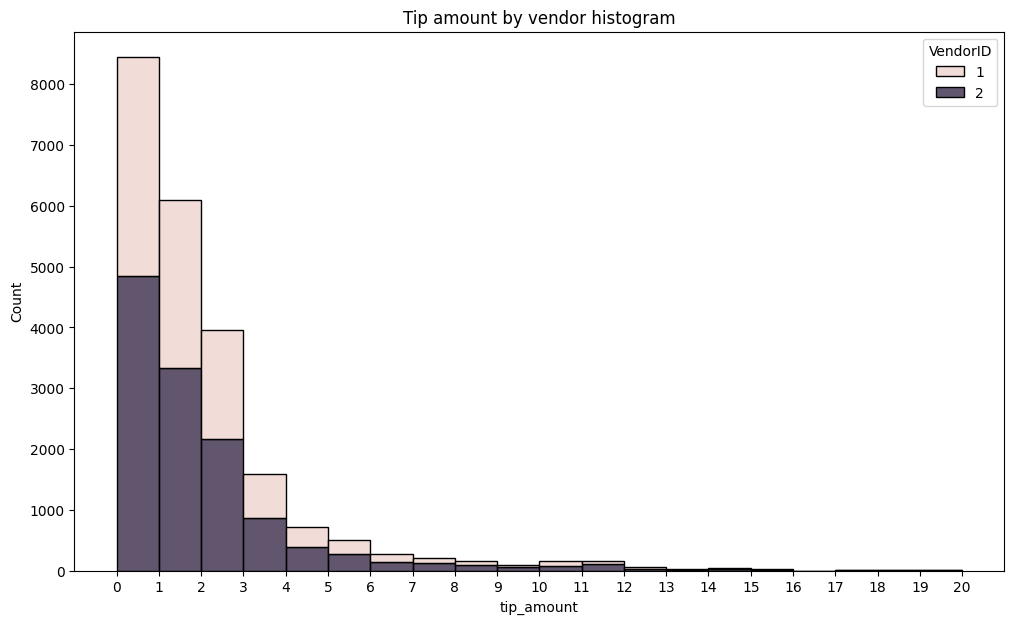

In [132]:
# Creating histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
                  hue='VendorID',multiple='stack')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

In [133]:
df['passenger_count'].value_counts()

,count
passenger_count,
1,16002
2,3286
5,1143
3,949
6,689
4,450


In [134]:
# Calculating mean tips by passenger_count
mean_tips_by_passenger_count =df.groupby('passenger_count')[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
1,1.845204
2,1.835788
3,1.709610
4,1.547267
5,1.873185
6,1.723353


<ipython-input-135-57f057d5fd86>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
<ipython-input-135-57f057d5fd86>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


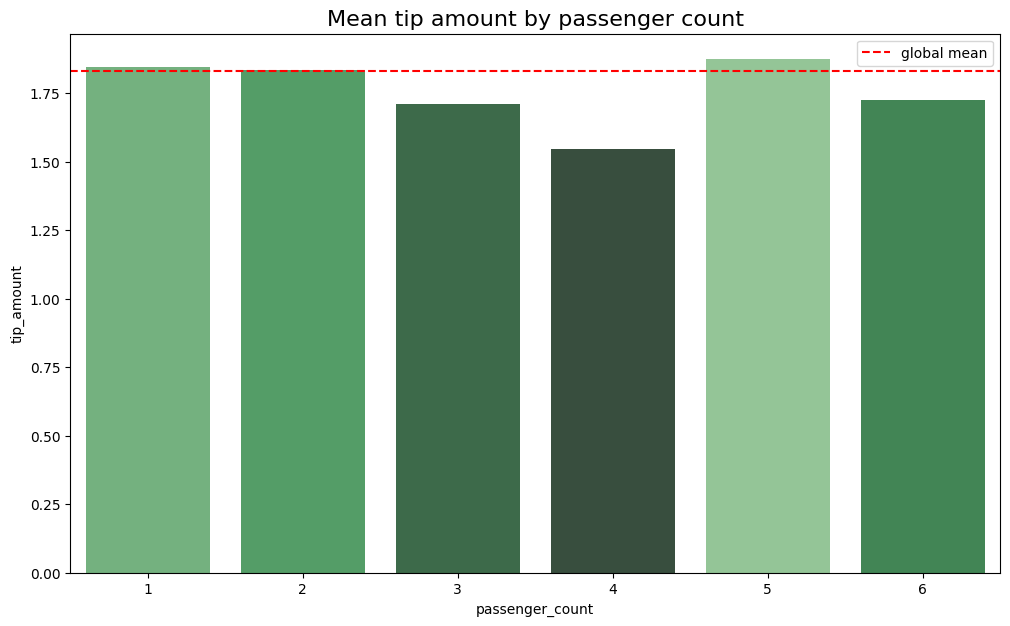

In [135]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

Create month and day columns

In [136]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.lower()
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,saturday,march
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,tuesday,april
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,friday,december
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,saturday,april
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,friday,february
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,sunday,august
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,monday,september
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,saturday,july


In [137]:
# Get total number of rides for each month
month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july','august', 'september', 'october', 'november', 'december']
monthly_rides = df['month'].value_counts().reindex(index=month_order)
monthly_rides

,count
month,
january,1982
february,1759
march,2031
april,2008
may,2004
june,1945
july,1683
august,1717
september,1725


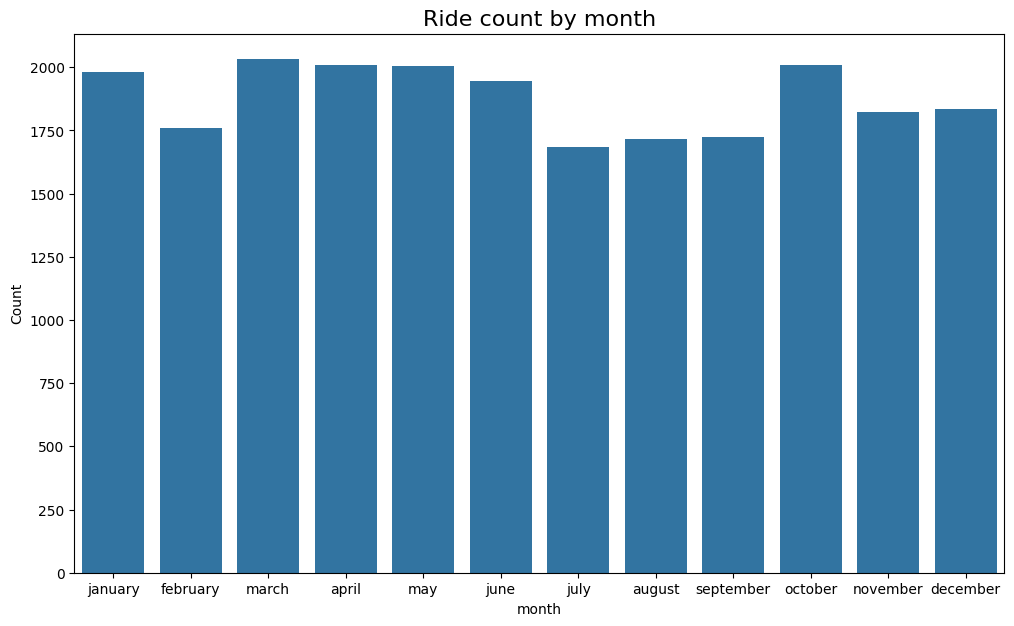

In [138]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_ylabel('Count')
plt.title('Ride count by month', fontsize=16);

In [139]:
# Get total number of rides for each day
daily_rides = df['day'].value_counts()
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

,count
day,
monday,2911
tuesday,3163
wednesday,3368
thursday,3370
friday,3385
saturday,3350
sunday,2972


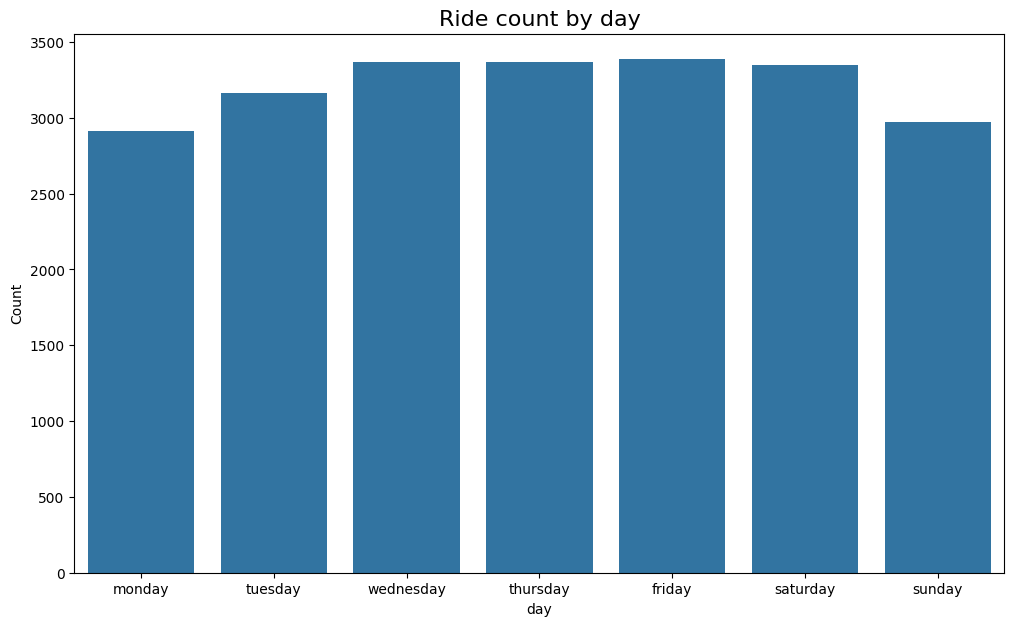

In [140]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Create mean_distance column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature.

Therefore, create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.

In [141]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

,pickup_dropoff
0,100 231
1,186 43


In [142]:
grouped = df.groupby('pickup_dropoff')[['trip_distance']].mean()
grouped

,trip_distance
pickup_dropoff,
1 1,7.300000
10 148,15.700000
100 1,16.890000
100 100,0.304000
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


In [143]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 7.3,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.304,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.9344444444444444,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6725,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.2458333333333333,
 '100 234': 1.2545454545

In [144]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)
# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day,month,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,14.066667,saturday,march,100 231,3.521667
4909,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,0.5,4.59,0.0,0.3,19.89,18.700000,tuesday,november,100 231,3.521667
16636,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,0.5,2.00,0.0,0.3,17.30,14.816667,tuesday,june,100 231,3.521667
18134,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,0.5,0.00,0.0,0.3,28.80,47.533333,thursday,june,100 231,3.521667
19761,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,0.5,2.85,0.0,0.3,17.15,17.316667,wednesday,february,100 231,3.521667
20581,49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,...,0.5,0.00,0.0,0.3,19.80,24.650000,friday,june,100 231,3.521667


Create mean_duration column

In [145]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


Create rush_hour column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

In [146]:
df['rush_hour'] = df['tpep_pickup_datetime'].apply(
    lambda x: 1 if x.weekday() < 5 and (6 <= x.hour <= 10 or 16 <= x.hour <= 20) else 0
)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,day,month,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,saturday,march,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,tuesday,april,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,friday,december,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,sunday,may,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,saturday,april,4 112,4.435000,14.616667,0


# **Part 3**

In [147]:
df.groupby('payment_type')[['fare_amount']].mean()

,fare_amount
payment_type,
1,13.217362
2,12.123923
3,13.242673
4,13.372093


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.


Chose 5% as the significance level

In [148]:
credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=7.487423210177702, pvalue=7.420872279966489e-14, df=14760.166609785045)

As p-value is smaller than significance level, there is enough evidence to reject the null hypothesis. so, there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash

# **Part 4**

In [149]:
df2 = df.copy()
#Feature Selection
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22519 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22519 non-null  int64  
 1   passenger_count  22519 non-null  int64  
 2   fare_amount      22519 non-null  float64
 3   mean_distance    22519 non-null  float64
 4   mean_duration    22519 non-null  float64
 5   rush_hour        22519 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


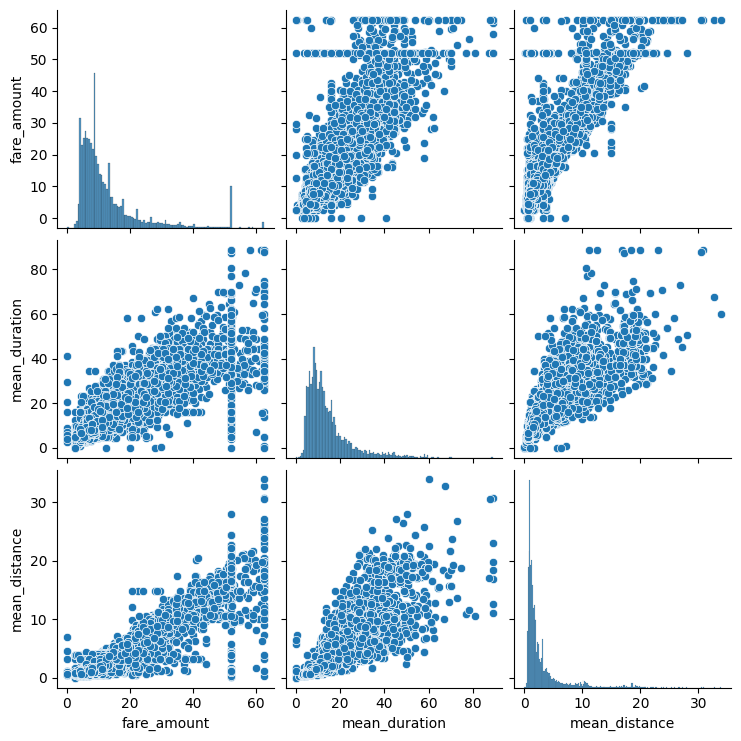

In [150]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other.

In [151]:
df2.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.265213,-0.001611,0.003675,-0.000060,0.000117
passenger_count,0.265213,1.000000,0.015494,0.012821,0.014985,-0.024385
fare_amount,-0.001611,0.015494,1.000000,0.927564,0.879190,-0.025256
mean_distance,0.003675,0.012821,0.927564,1.000000,0.874674,-0.046369
mean_duration,-0.000060,0.014985,0.879190,0.874674,1.000000,-0.026201
rush_hour,0.000117,-0.024385,-0.025256,-0.046369,-0.026201,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

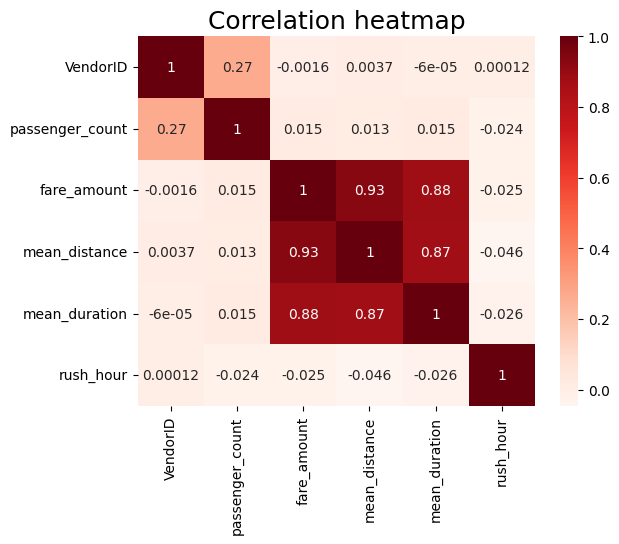

In [152]:
# Create correlation heatmap
sns.heatmap(df2.corr(), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount

In [153]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

In [154]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [155]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,-0.503326,-0.328979,-0.508124,-0.772889,0.892452
1,2.617720,-0.500704,-0.621019,-0.772889,0.892452
2,3.397982,-0.477967,-0.101433,-0.772889,0.892452
3,-0.503326,-0.509335,-0.609713,1.293847,-1.120509
4,-0.503326,-0.428037,-0.232912,1.293847,-1.120509
...,...,...,...,...,...
18010,-0.503326,-0.407909,-0.118246,-0.772889,0.892452
18011,-0.503326,-0.549616,-0.541597,-0.772889,0.892452
18012,0.276935,-0.149615,0.788840,1.293847,-1.120509
18013,0.276935,1.961733,0.859995,1.293847,0.892452


In [157]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [158]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8798374745156173
R^2: 0.8798374745156173
MAE: 2.0592059329114396
MSE: 13.032403844171716
RMSE: 3.610042083435


In [159]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [160]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8816041434374102
R^2: 0.8816041434374102
MAE: 2.051733101595384
MSE: 12.940657450735747
RMSE: 3.5973125317013737


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
16631,19.5,16.327388,3.172612
17549,3.5,5.544824,-2.044824
11989,5.5,7.231764,-1.731764
5544,18.0,19.981325,-1.981325
4685,3.0,4.926339,-1.926339


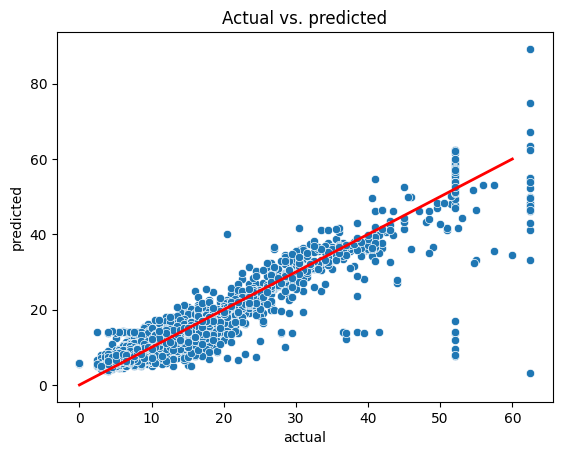

In [162]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

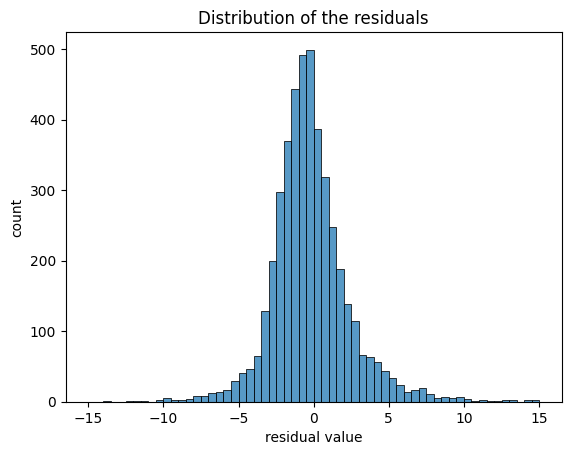

In [163]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [164]:
# Calculate residual mean
results['residual'].mean()

-0.04852383366775269

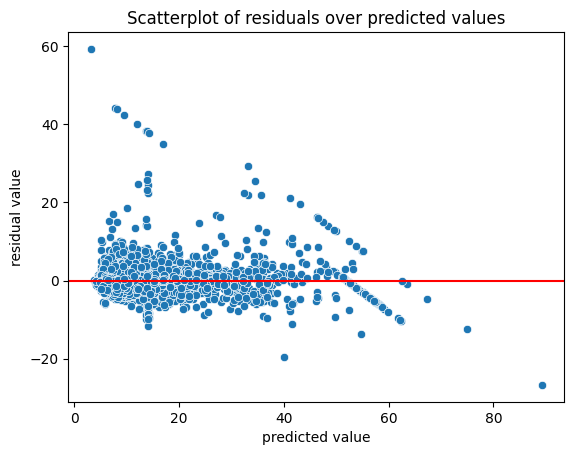

In [165]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [166]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.071217,7.041458,3.001549,0.142552,-0.068818


In [167]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.5584211740780387
2.00478432737753


Now you can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of 7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of $2.00.

# **Part 5**

Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra. Effectively limiting equal access to taxis is ethically problematic, and carries a lot of risk.

We can build a model that predicts the most generous customers(people who will tip 20% or more). This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis.

In [168]:
# Subset the data to isolate only customers who paid by credit card
df3=df[df['payment_type']==1]

In [169]:
# Create tip % col
df3['tip_percent']=round(df3['tip_amount']/(df3['total_amount']-df3['tip_amount']),3)

<ipython-input-169-2ef2c372dd16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tip_percent']=round(df3['tip_amount']/(df3['total_amount']-df3['tip_amount']),3)


In [170]:
# Create 'generous' col (target)
df3['generous'] = (df3['tip_percent'] >= 0.2)
df3['generous'] = df3['generous'].astype(int)
df3.head()

<ipython-input-170-57188b8e57b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['generous'] = (df3['tip_percent'] >= 0.2)
<ipython-input-170-57188b8e57b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['generous'] = df3['generous'].astype(int)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,total_amount,duration,day,month,pickup_dropoff,mean_distance,mean_duration,rush_hour,tip_percent,generous
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,16.56,14.066667,saturday,march,100 231,3.521667,22.847222,0,0.200,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,20.80,26.500000,tuesday,april,186 43,3.108889,24.470370,0,0.238,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,8.75,7.200000,friday,december,262 236,0.881429,7.250000,1,0.199,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,27.69,30.250000,sunday,may,188 97,3.700000,30.250000,0,0.300,1
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,12.36,8.000000,saturday,march,161 236,2.052258,11.855376,0,0.200,1


Create time of day columns

Four new columns that represent time of day bins

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [171]:
# Create 'am_rush' col
df3['am_rush'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df3['daytime'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df3['pm_rush'] = df3['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df3['nighttime'] = df3['tpep_pickup_datetime'].dt.hour

<ipython-input-171-2ed8e1f5ef26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['am_rush'] = df3['tpep_pickup_datetime'].dt.hour
<ipython-input-171-2ed8e1f5ef26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['daytime'] = df3['tpep_pickup_datetime'].dt.hour
<ipython-input-171-2ed8e1f5ef26>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [172]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [173]:
# Apply 'am_rush' function to the 'am_rush' series
df3['am_rush'] = df3.apply(am_rush, axis=1)
df3['am_rush'].head()

<ipython-input-173-8a823828c16a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['am_rush'] = df3.apply(am_rush, axis=1)


,am_rush
0,1
1,0
2,1
3,0
5,0


In [174]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [175]:
# Apply 'daytime' function to the 'daytime' series
df3['daytime'] = df3.apply(daytime, axis=1)

<ipython-input-175-0afba605da56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['daytime'] = df3.apply(daytime, axis=1)


In [176]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [177]:
# Apply 'pm_rush' function to the 'pm_rush' series
df3['pm_rush'] = df3.apply(pm_rush, axis=1)

<ipython-input-177-8e3a77bcb96f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pm_rush'] = df3.apply(pm_rush, axis=1)


In [178]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [179]:
# Apply 'nighttime' function to the 'nighttime' series
df3['nighttime'] = df3.apply(nighttime, axis=1)

<ipython-input-179-10cccebb3d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['nighttime'] = df3.apply(nighttime, axis=1)


In [180]:
# feature selection
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent','rush_hour','pickup_dropoff','duration']

df3 = df3.drop(drop_cols, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15177 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15177 non-null  int64  
 1   passenger_count  15177 non-null  int64  
 2   RatecodeID       15177 non-null  int64  
 3   PULocationID     15177 non-null  int64  
 4   DOLocationID     15177 non-null  int64  
 5   fare_amount      15177 non-null  float64
 6   day              15177 non-null  object 
 7   month            15177 non-null  object 
 8   mean_distance    15177 non-null  float64
 9   mean_duration    15177 non-null  float64
 10  generous         15177 non-null  int64  
 11  am_rush          15177 non-null  int64  
 12  daytime          15177 non-null  int64  
 13  pm_rush          15177 non-null  int64  
 14  nighttime        15177 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


Variable encoding

In [181]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df3[col] = df3[col].astype('str')

In [182]:
df3 = pd.get_dummies(df3, drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15177 entries, 0 to 22698
Columns: 344 entries, passenger_count to month_september
dtypes: bool(335), float64(3), int64(6)
memory usage: 6.0 MB


In [183]:
# Get class balance of 'generous' col
df3['generous'].value_counts(normalize=True)

,proportion
generous,
1,0.526586
0,0.473414


A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers

F1 score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

Split the data

In [184]:
# Isolate target variable (y)
y = df3['generous']

# Isolate the features (X)
X = df3.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [185]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [6,7,None],
             'max_features': [4,5,6],
             'max_samples': [0.7],
             'min_samples_leaf': [3,4,5],
             'min_samples_split': [2,3,4],
             'n_estimators': [300,350,400]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [186]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 7, None], 'max_features': [4, 5, 6],
                         'max_samples': [0.7], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 350, 400]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [187]:
# Examine best score
rf1.best_score_

0.7506601681502216

In [188]:
#Examine the best combination of hyperparameters
rf1.best_params_

{'max_depth': None,
 'max_features': 5,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 350}

In [189]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [190]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.687268,0.827001,0.75066,0.710733


In [191]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

In [192]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [193]:
 # Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.687268,0.827001,0.750660,0.710733
0,RF test,0.696017,0.830519,0.757342,0.719697
